In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [43]:
df=pd.read_csv("./cardio_train.csv",sep=";")

In [44]:
df=df.drop(columns=['id'])

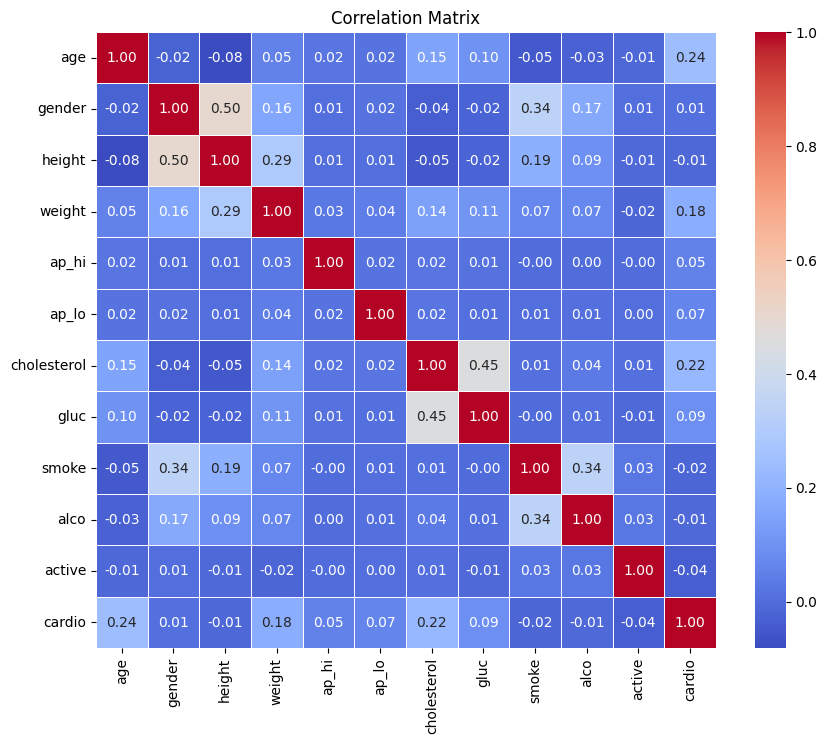

In [45]:
corr_matrix = df.corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler

# Convert age from days to years
df['age'] = df['age'] / 365  

# Select numerical columns for standardization
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Apply StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [47]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436062,2,0.443452,-0.847873,-0.122182,-0.088238,1,1,0,0,1,0
1,0.307686,1,-1.018168,0.749831,0.072610,-0.035180,3,1,0,0,1,1
2,-0.247997,1,0.078047,-0.708942,0.007679,-0.141297,3,1,0,0,0,1
3,-0.748152,2,0.565254,0.541435,0.137541,0.017879,1,1,0,0,1,1
4,-0.808543,1,-1.018168,-1.264666,-0.187113,-0.194356,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.092762,2,0.443452,0.124642,-0.057251,-0.088238,1,1,1,0,1,0
69996,1.269492,1,-0.774565,3.597913,0.072610,-0.035180,2,2,0,0,1,1
69997,-0.163286,2,2.270477,2.139139,0.332333,-0.035180,3,1,0,1,0,1
69998,1.200589,1,-0.165556,-0.153219,0.040145,-0.088238,1,2,0,0,0,1


In [48]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X = dataset.drop(columns=['cardio'])
y = dataset['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the training, validation, and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (44800, 12)
Shape of X_val: (11200, 12)
Shape of X_test: (14000, 12)
Shape of y_train: (44800,)
Shape of y_val: (11200,)
Shape of y_test: (14000,)


In [49]:
from sklearn.ensemble import (
    StackingClassifier,    RandomForestClassifier,     GradientBoostingClassifier,     AdaBoostClassifier,     ExtraTreesClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Base models
rf = RandomForestClassifier(criterion='entropy', max_features='sqrt')
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, splitter='random')
gb = GradientBoostingClassifier(max_depth=4, min_samples_leaf=20)
gnb = GaussianNB(var_smoothing=0.004328761281083057)
svm = SVC(C=100, gamma='auto', probability=True)
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
lr = LogisticRegression(C=0.615848211066026, max_iter=500, penalty='l1', solver='liblinear')

# Additional models
et = ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_features='sqrt')
adb = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
xgb_clf = xgb.XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=100, use_label_encoder=False, eval_metric='logloss')

# Creating a list of all classifiers
models = {
    "Random Forest": rf,    "Decision Tree": dt,    "Gradient Boosting": gb,    "GaussianNB": gnb,    "SVM": svm,    "KNN": knn,    "Logistic Regression": lr,    "Extra Trees": et,    "AdaBoost": adb,    "XGBoost": xgb_clf}


In [50]:
es1 = [('clf1', et), ('clf2', rf), ('clf3', gb), ('clf4', dt)]
es2 = [('clf1', et), ('clf2', rf), ('clf3', gb), ('clf4', dt)]
es3 = [('clf1', et), ('clf2', rf), ('clf3', gb), ('clf4', dt)]
es4 = [('clf1', et), ('clf2', rf), ('clf3', gb), ('clf4', dt)]  #gnb replaced with dt

ev1 = [('clf1', rf), ('clf2', dt), ('clf3', gb), ('clf4', gnb)]
ev2 = [('clf1', dt), ('clf2', gb), ('clf3', svm), ('clf4', adb)]
ev3 = [('clf1', rf), ('clf2', knn), ('clf3', dt), ('clf4', gb)]
ev4 = [('clf1', dt), ('clf2', gb), ('clf3', lr), ('clf4', svm)]
ev5 = []


es5 = []

# Stack 1

In [51]:
# Create a VotingClassifier with base classifiers clf1, clf2, clf3, and clf4
voting_clf1 = VotingClassifier(
    estimators=ev1,
    voting='soft'
)
# Create a StackingClassifier with base classifiers clf1, clf2, clf3, and clf4, and meta-classifier voting_clf
sclf1 = StackingClassifier(
    estimators=es1,
    final_estimator=voting_clf1
)

# Fit the Stacking Classifier to the training data
sclf1.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf1, voting_clf1)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train1 = pipeline[:-1].transform(X_train)

# Now you can inspect the transformed training data
# For example, you can print the first few rows
# print(transformed_X_train1[:5])  # Print the first 5 rows

# Optionally, you can perform further analysis or visualization on this transformed data
# For example, you can plot histograms or scatter plots to explore the distribution of features

from sklearn.metrics import confusion_matrix
import seaborn as sns
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define the function to calculate false negative percentage


# Assuming you have defined the necessary variables and models

print("Accuracy for stack 1(Validation): ")

# Make predictions on the validation set
val_predictions1 = sclf1.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions1)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions1, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions1, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions1, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
# cm = confusion_matrix(y_val, val_predictions1)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
# plt.title("Confusion Matrix - Validation Data")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions1)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")

print()
print()

print("Accuracy for stack 1(Test): ")

# Make predictions on the test set
test_predictions1 = sclf1.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions1)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions1, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions1, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions1, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
# cm = confusion_matrix(y_test, test_predictions1)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.title("Confusion Matrix - Test Data")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions1)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


Accuracy for stack 1(Validation): 
Validation Accuracy: 0.7356
Validation Precision: 0.7378
Validation Recall: 0.7356
Validation F1 Score: 0.7352
False Negative Percentage for Validation Data: 30.69%


Accuracy for stack 1(Test): 
Test Accuracy: 0.7339
Test Precision: 0.7351
Test Recall: 0.7339
Test F1 Score: 0.7334
False Negative Percentage for Test Data: 30.51%


# Stack 2

In [52]:
# Create a VotingClassifier with base classifiers clf1, clf2, clf3, and clf4
voting_clf2 = VotingClassifier(
    estimators=ev2,
    voting='soft'
)
# Create a StackingClassifier with base classifiers clf1, clf2, clf3, and clf4, and meta-classifier voting_clf
sclf2 = StackingClassifier(
    estimators=es2,
    final_estimator=voting_clf2
)



# Fit the Stacking Classifier to the training data
sclf2.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf2, voting_clf2)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train2 = pipeline[:-1].transform(X_train)


# print(transformed_X_train2[:5])  # Print the first 5 rows

print("Accuracy for stack 2(Validation): ")

# Make predictions on the validation set
val_predictions2 = sclf2.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions2)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions2, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions2, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions2, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
# cm = confusion_matrix(y_val, val_predictions2)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
# plt.title("Confusion Matrix - Validation Data")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions2)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


print()
print()

print("Accuracy for stack 2(Test): ")

# Make predictions on the test set
test_predictions2 = sclf2.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions2)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions2, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions2, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions2, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
# cm = confusion_matrix(y_test, test_predictions2)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.title("Confusion Matrix - Test Data")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions2)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")



c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for stack 2(Validation): 
Validation Accuracy: 0.7359
Validation Precision: 0.7383
Validation Recall: 0.7359
Validation F1 Score: 0.7354
False Negative Percentage for Validation Data: 30.94%


Accuracy for stack 2(Test): 
Test Accuracy: 0.7371
Test Precision: 0.7382
Test Recall: 0.7371
Test F1 Score: 0.7367
False Negative Percentage for Test Data: 30.00%


# Stack 3

In [53]:
voting_clf3 = VotingClassifier(
    estimators=ev3,
    voting='soft'
)

# Create a StackingClassifier with base classifiers clf1, clf2, clf3, and clf4, and meta-classifier voting_clf
sclf3 = StackingClassifier(
    estimators=es3,
    final_estimator=voting_clf3
)


# Fit the Stacking Classifier to the training data
sclf3.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf3, voting_clf3)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train3 = pipeline[:-1].transform(X_train)


# print(transformed_X_train3[:5])  # Print the first 5 rows

print("Accuracy for stack 3(Validation): ")

# Make predictions on the validation set
val_predictions3 = sclf3.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions3)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions3, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions3, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions3, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# # Plot confusion matrix for validation data
# cm = confusion_matrix(y_val, val_predictions3)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
# plt.title("Confusion Matrix - Validation Data")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions3)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


print()
print()

print("Accuracy for stack 3(Test): ")

# Make predictions on the test set
test_predictions3 = sclf3.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions3)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions3, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions3, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions3, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
# cm = confusion_matrix(y_test, test_predictions3)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.title("Confusion Matrix - Test Data")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions3)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")



Accuracy for stack 3(Validation): 
Validation Accuracy: 0.7282
Validation Precision: 0.7297
Validation Recall: 0.7282
Validation F1 Score: 0.7279
False Negative Percentage for Validation Data: 30.74%


Accuracy for stack 3(Test): 
Test Accuracy: 0.7306
Test Precision: 0.7313
Test Recall: 0.7306
Test F1 Score: 0.7304
False Negative Percentage for Test Data: 29.90%


# Stack 4

In [55]:
voting_clf4 = VotingClassifier(
    estimators=ev4,
    voting='soft'
)


# Create a StackingClassifier with base classifiers clf1, clf2, clf3, and clf4, and meta-classifier voting_clf
sclf4 = StackingClassifier(
    estimators=ev4,
    final_estimator=voting_clf4
    
)
# Fit the Stacking Classifier to the training data
sclf4.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf4, voting_clf4)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train4 = pipeline[:-1].transform(X_train)


# print(transformed_X_train4[:5])  # Print the first 5 rows

print("Accuracy for stack 4(Validation): ")

# Make predictions on the validation set
val_predictions4 = sclf4.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions4)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions4, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions4, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions4, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
# cm = confusion_matrix(y_val, val_predictions4)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
# plt.title("Confusion Matrix - Validation Data")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions4)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


print()
print()

print("Accuracy for stack 4(Test): ")

# Make predictions on the test set
test_predictions4 = sclf4.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions4)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions4, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions4, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions4, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
# cm = confusion_matrix(y_test, test_predictions4)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.title("Confusion Matrix - Test Data")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions4)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")



Accuracy for stack 4(Validation): 
Validation Accuracy: 0.7365
Validation Precision: 0.7405
Validation Recall: 0.7365
Validation F1 Score: 0.7356
False Negative Percentage for Validation Data: 32.30%


Accuracy for stack 4(Test): 
Test Accuracy: 0.7385
Test Precision: 0.7409
Test Recall: 0.7385
Test F1 Score: 0.7377
False Negative Percentage for Test Data: 31.45%


# <h1 style="Color: Violet"> Combined Majority voting

In [56]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the function to calculate false negative percentage
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

# Combine predictions using majority voting
combined_val_predictions = []
for p1, p2, p3, p4 in zip(val_predictions1, val_predictions2, val_predictions3, val_predictions4):
    votes = Counter([p1, p2, p3, p4])
    combined_val_predictions.append(votes.most_common(1)[0][0])

# Plot confusion matrix for the combined model
# cm_combined = confusion_matrix(y_val, combined_val_predictions)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
# plt.title("Confusion Matrix - Combined Model (Validation Data)")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# Calculate and print the false negative percentage for the combined model
false_negative_percentage_combined = calculate_false_negative(y_val, combined_val_predictions)
print(f"False Negative Percentage for Combined Model (Validation Data): {false_negative_percentage_combined:.2f}%")

# Calculate metrics for the combined model
accuracy_combined = accuracy_score(y_val, combined_val_predictions)
precision_combined = precision_score(y_val, combined_val_predictions, average='weighted')
recall_combined = recall_score(y_val, combined_val_predictions, average='weighted')
f1_combined = f1_score(y_val, combined_val_predictions, average='weighted')

# Print metrics for the combined model
print("Accuracy for Combined Model (Validation Data): ", accuracy_combined)
print("Precision for Combined Model (Validation Data): ", precision_combined)
print("Recall for Combined Model (Validation Data): ", recall_combined)
print("F1 Score for Combined Model (Validation Data): ", f1_combined)


False Negative Percentage for Combined Model (Validation Data): 30.95%
Accuracy for Combined Model (Validation Data):  0.7355357142857143
Precision for Combined Model (Validation Data):  0.7379070264194245
Recall for Combined Model (Validation Data):  0.7355357142857143
F1 Score for Combined Model (Validation Data):  0.7350395840291046


In [57]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the function to calculate false negative percentage
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

# Combine predictions using majority voting
combined_test_predictions = []
for p1, p2, p3, p4 in zip(test_predictions1, test_predictions2, test_predictions3, test_predictions4):
    votes = Counter([p1, p2, p3, p4])
    combined_test_predictions.append(votes.most_common(1)[0][0])

# Plot confusion matrix for the combined model
# cm_combined = confusion_matrix(y_test, combined_test_predictions)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.title("Confusion Matrix - Combined Model (Test Data)")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# Calculate and print the false negative percentage for the combined model
false_negative_percentage_combined = calculate_false_negative(y_test, combined_test_predictions)
print(f"False Negative Percentage for Combined Model (Test Data): {false_negative_percentage_combined:.2f}%")

# Calculate metrics for the combined model
accuracy_combined = accuracy_score(y_test, combined_test_predictions)
precision_combined = precision_score(y_test, combined_test_predictions, average='weighted')
recall_combined = recall_score(y_test, combined_test_predictions, average='weighted')
f1_combined = f1_score(y_test, combined_test_predictions, average='weighted')

# Print metrics for the combined model
print("Accuracy for Combined Model (Test Data): ", accuracy_combined)
print("Precision for Combined Model (Test Data): ", precision_combined)
print("Recall for Combined Model (Test Data): ", recall_combined)
print("F1 Score for Combined Model (Test Data): ", f1_combined)


False Negative Percentage for Combined Model (Test Data): 30.54%
Accuracy for Combined Model (Test Data):  0.7357857142857143
Precision for Combined Model (Test Data):  0.7371507238923836
Recall for Combined Model (Test Data):  0.7357857142857143
F1 Score for Combined Model (Test Data):  0.7353143704273368


False Negative Percentage for Combined Model (Test Data): 32.04%
Accuracy for Combined Model (Test Data):  0.7365
Precision for Combined Model (Test Data):  0.7392441334894372
Recall for Combined Model (Test Data):  0.7365
F1 Score for Combined Model (Test Data):  0.7356167437833457